In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [302]:
df = pd.read_csv('Breast_cancer_dataset.csv')

In [303]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [305]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [306]:
df.drop(['Unnamed: 32' , 'id'] , axis=1 , inplace=True)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [308]:
df['diagnosis'] = df['diagnosis'].map({'M' : 1 , 'B' : 0})

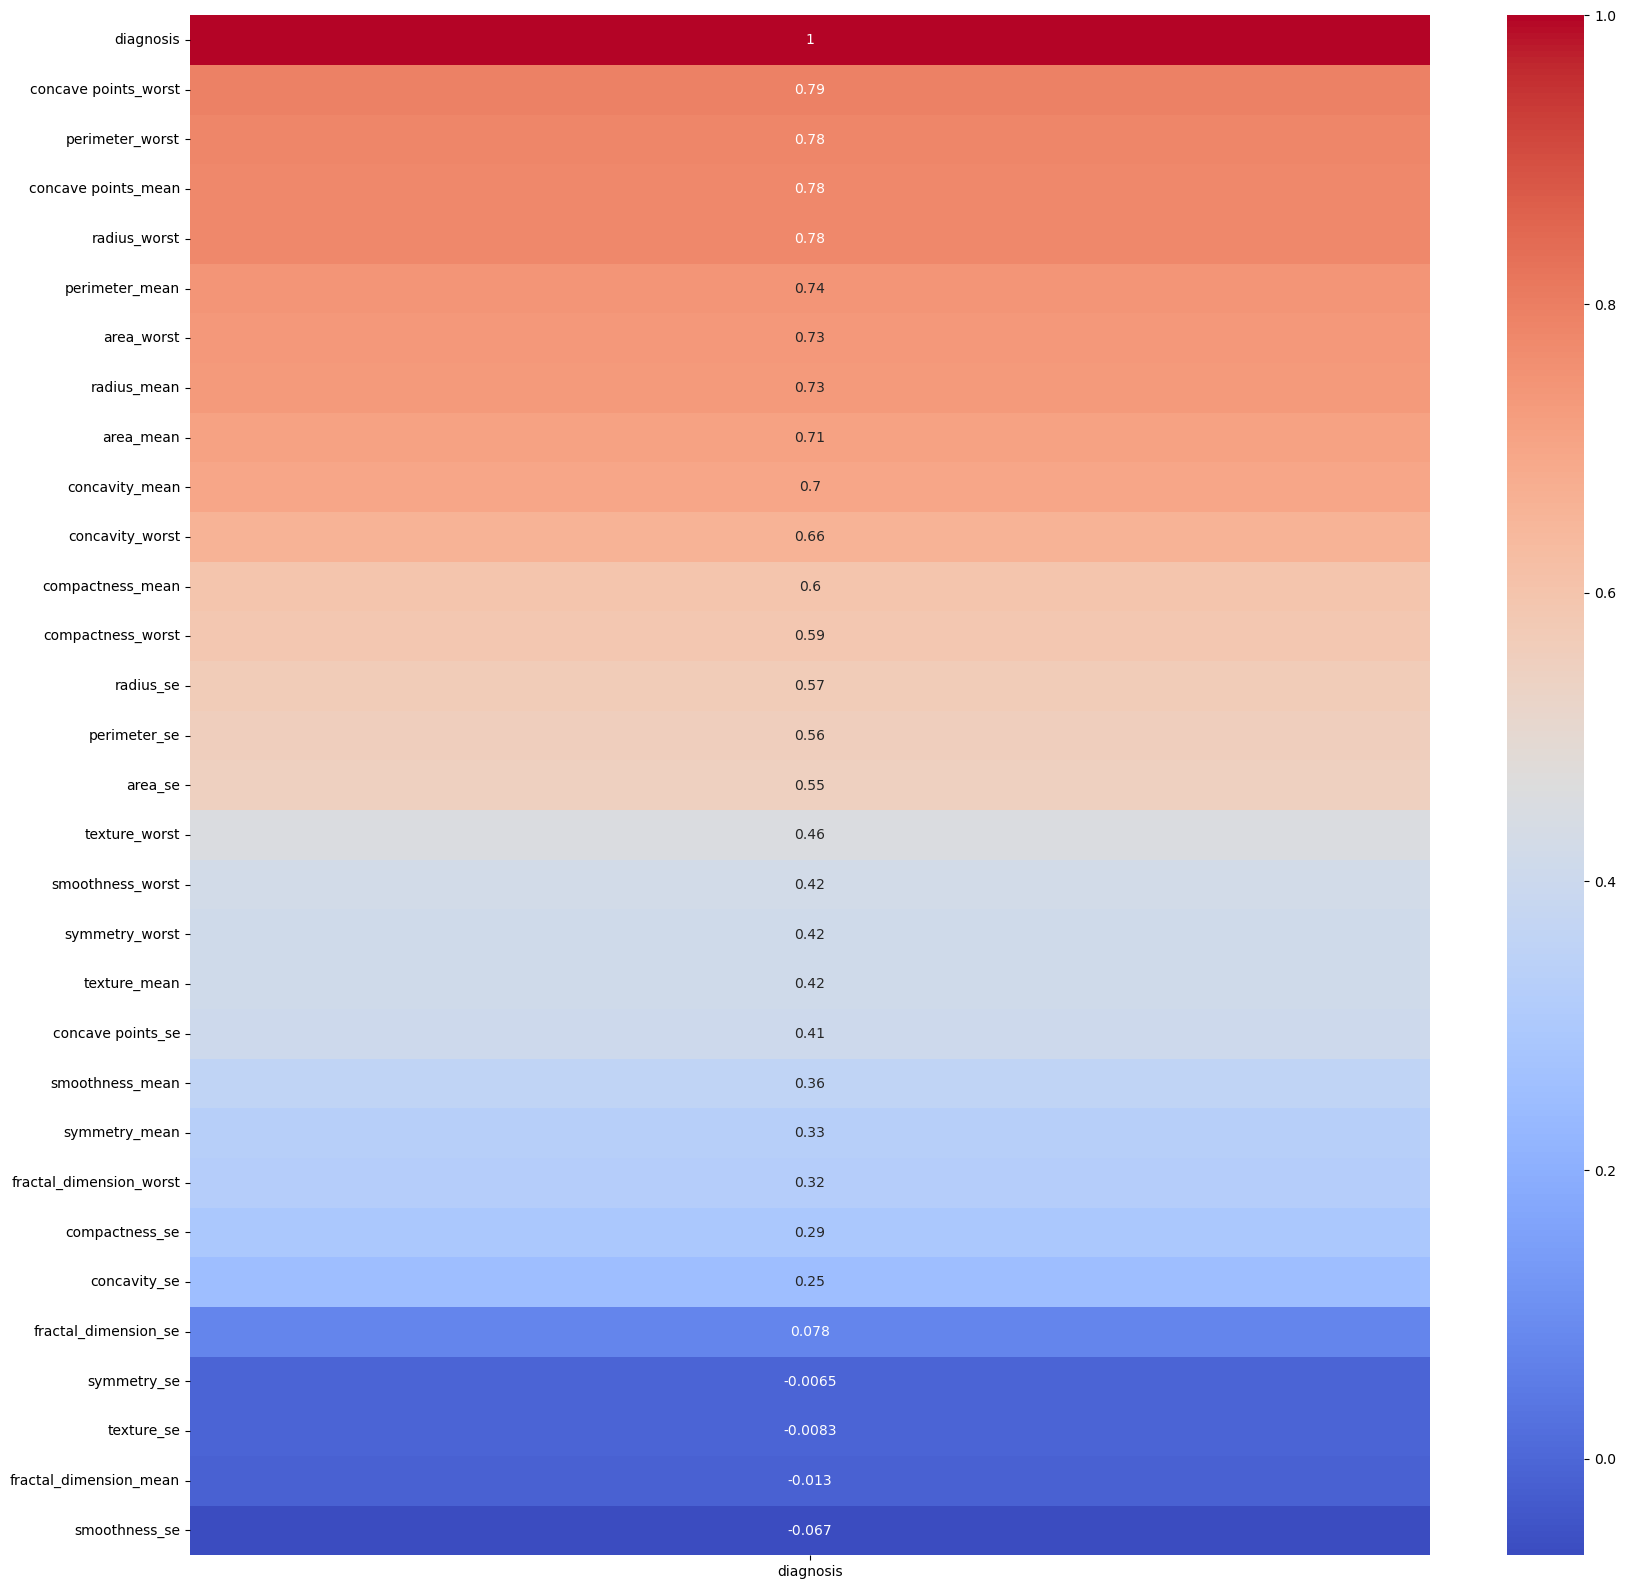

In [309]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr[['diagnosis']].sort_values(by = 'diagnosis' , ascending=False) , annot = True , cmap = 'coolwarm')
plt.show()

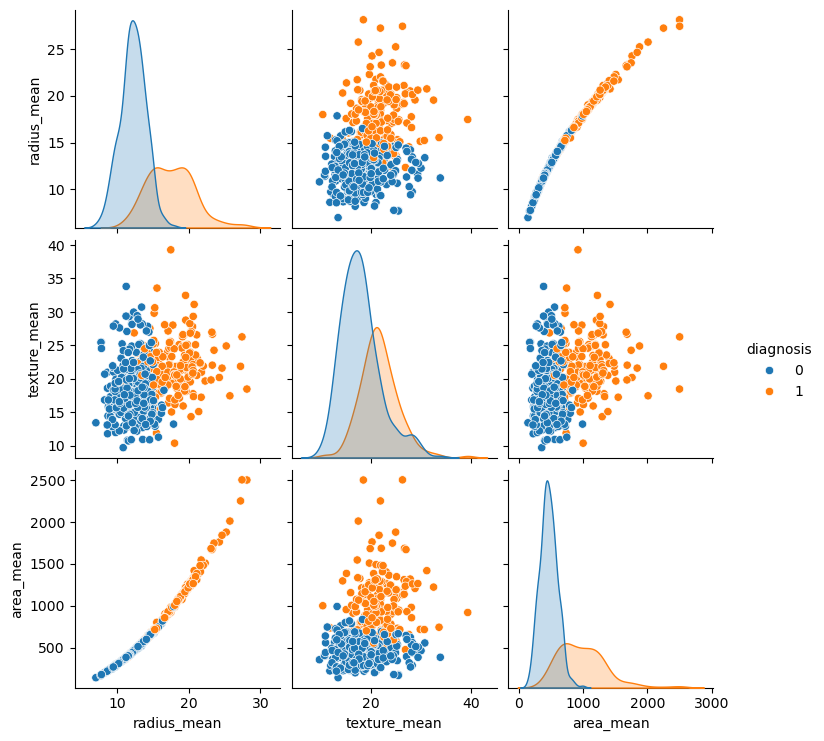

In [310]:
sns.pairplot(df, hue='diagnosis', vars=['radius_mean','texture_mean','area_mean'])
plt.show()

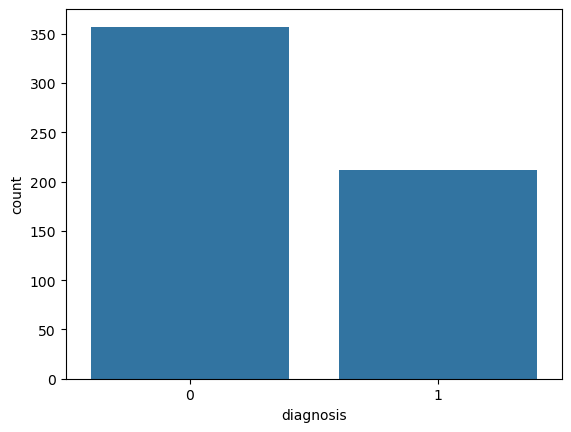

In [311]:
sns.countplot(x=df['diagnosis'])
plt.show()

In [312]:
high_corr_features = corr['diagnosis'][corr['diagnosis'].abs() >= 0.7].index
high_corr_features = high_corr_features.drop('diagnosis')

In [313]:
X = df.drop('diagnosis' , axis=1)
y = df['diagnosis']

In [314]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_scaled = st.fit_transform(X)
X = X_scaled

In [315]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [316]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
models = {
    'SVM' : SVC(),
    'Logistic Regression' : LogisticRegression(),
    'Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'KNN' : KNeighborsClassifier()
}

In [317]:
from sklearn.model_selection import cross_val_score
scores = []
for model_name , model in models.items() :
    test = cross_val_score(model , X , y , cv = 10 , scoring='accuracy')
    scores.append({'model' : model_name , 'Score' : test.mean()})
s = pd.DataFrame(scores)
s

,model,Score
0,SVM,0.977099
1,Logistic Regression,0.980670
2,Tree,0.913941
3,Random Forest,0.964912
4,KNN,0.966635


In [318]:
from sklearn.model_selection import GridSearchCV
models = {
    'SVM' : {
        'model' : SVC(),
        'par' : {
            'kernel' : ['rbf' , 'linear' , 'poly'],
            'C' : [0.1,1,10,100,1000]
        }
    },
    'logestic' : {
        'model' : LogisticRegression(),
        'par' : {
            'max_iter' : [100,300,500]
        }
    },
    'Random' : {
        'model' : RandomForestClassifier(),
        'par' : {
            'n_estimators' : [100,500]
        }
    }
}

In [ ]:
scores = []
for model_name , model in models.items() :
    mm = GridSearchCV(model['model'] , param_grid=model['par'],scoring='accuracy', cv = 5)
    mm.fit(X_train,y_train)
    scores.append({'model' : model_name , 'Best Score' : mm.best_score_*100 , 'Best Paramaters' : mm.best_params_ })

In [320]:
scores = pd.DataFrame(scores)
scores

,model,Best Score,Best Paramaters
0,SVM,97.362637,"{'C': 1, 'kernel': 'rbf'}"
1,logestic,97.142857,{'max_iter': 100}
2,Random,95.824176,{'n_estimators': 100}


In [321]:
model = SVC(C=1 , kernel='rbf')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix,ConfusionMatrixDisplay
accuracy_score(y_test,y_pred)*100

97.36842105263158

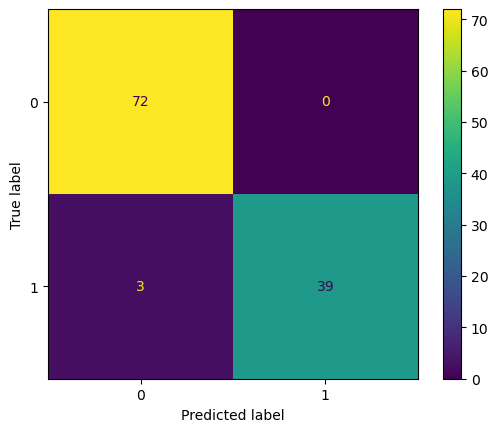

In [337]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [338]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

